# **TASK -3 NEURAL STYLE TRANSFER BY SAKSHI SRIVASTAVA**
**IMPLEMENT A NEURAL STYLE TRANSFER MODEL TO APPLY ARTISTIC STYLES TO PHOTOGRAPHS**
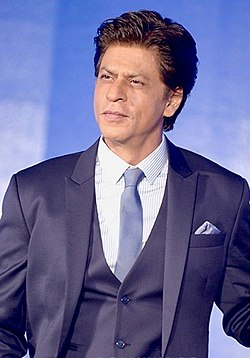

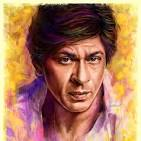

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
# Function to load and preprocess image
def load_image(image_path):
    """
    Load and preprocess the image from the given path.
    Resizes it to 256x256 and scales pixel values to [0,1].
    """
    image = Image.open(image_path).resize((256, 256))
    image = np.array(image) / 255.0  # Normalize pixel values
    image = tf.convert_to_tensor(image, dtype=tf.float32)
    return image[tf.newaxis, :]  # Add batch dimension

In [3]:
# Function to perform neural style transfer
def apply_style_transfer(content_path, style_path):
    """
    Applies the style from style_path image to the content_path image using
    a pre-trained model from TensorFlow Hub.
    """
    # Load images
    content_image = load_image(content_path)
    style_image = load_image(style_path)

    # Load TensorFlow Hub model for arbitrary style transfer
    style_transfer_model = hub.load("https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2")

    # Perform style transfer
    stylized_image = style_transfer_model(content_image, style_image)[0]
    return stylized_image


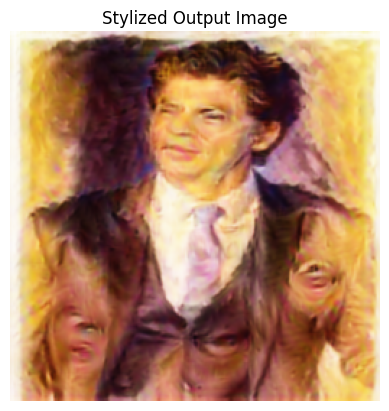

In [5]:
# Main block to run the style transfer
if __name__ == "__main__":
    content_image_path = "/content/content.jpg"  # Replace with your image
    style_image_path = "/content/style_image.jpeg"      # Replace with your image

    output_image = apply_style_transfer(content_image_path, style_image_path)

    # Display the stylized image
    plt.imshow(tf.squeeze(output_image))  # Remove batch dimension
    plt.axis('off')
    plt.title("Stylized Output Image")
    plt.show()